> # 1.0 Importing libraries and exploring Data

# 1.1 Import liblaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

# 1.2 Import dataset

In [6]:
df = pd.read_csv('data/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# 1.3  Dataset shape

In [7]:
df.shape

(215, 15)

# 1.4 Check types

In [8]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

# 1.5 Checking for missing data

<Axes: >

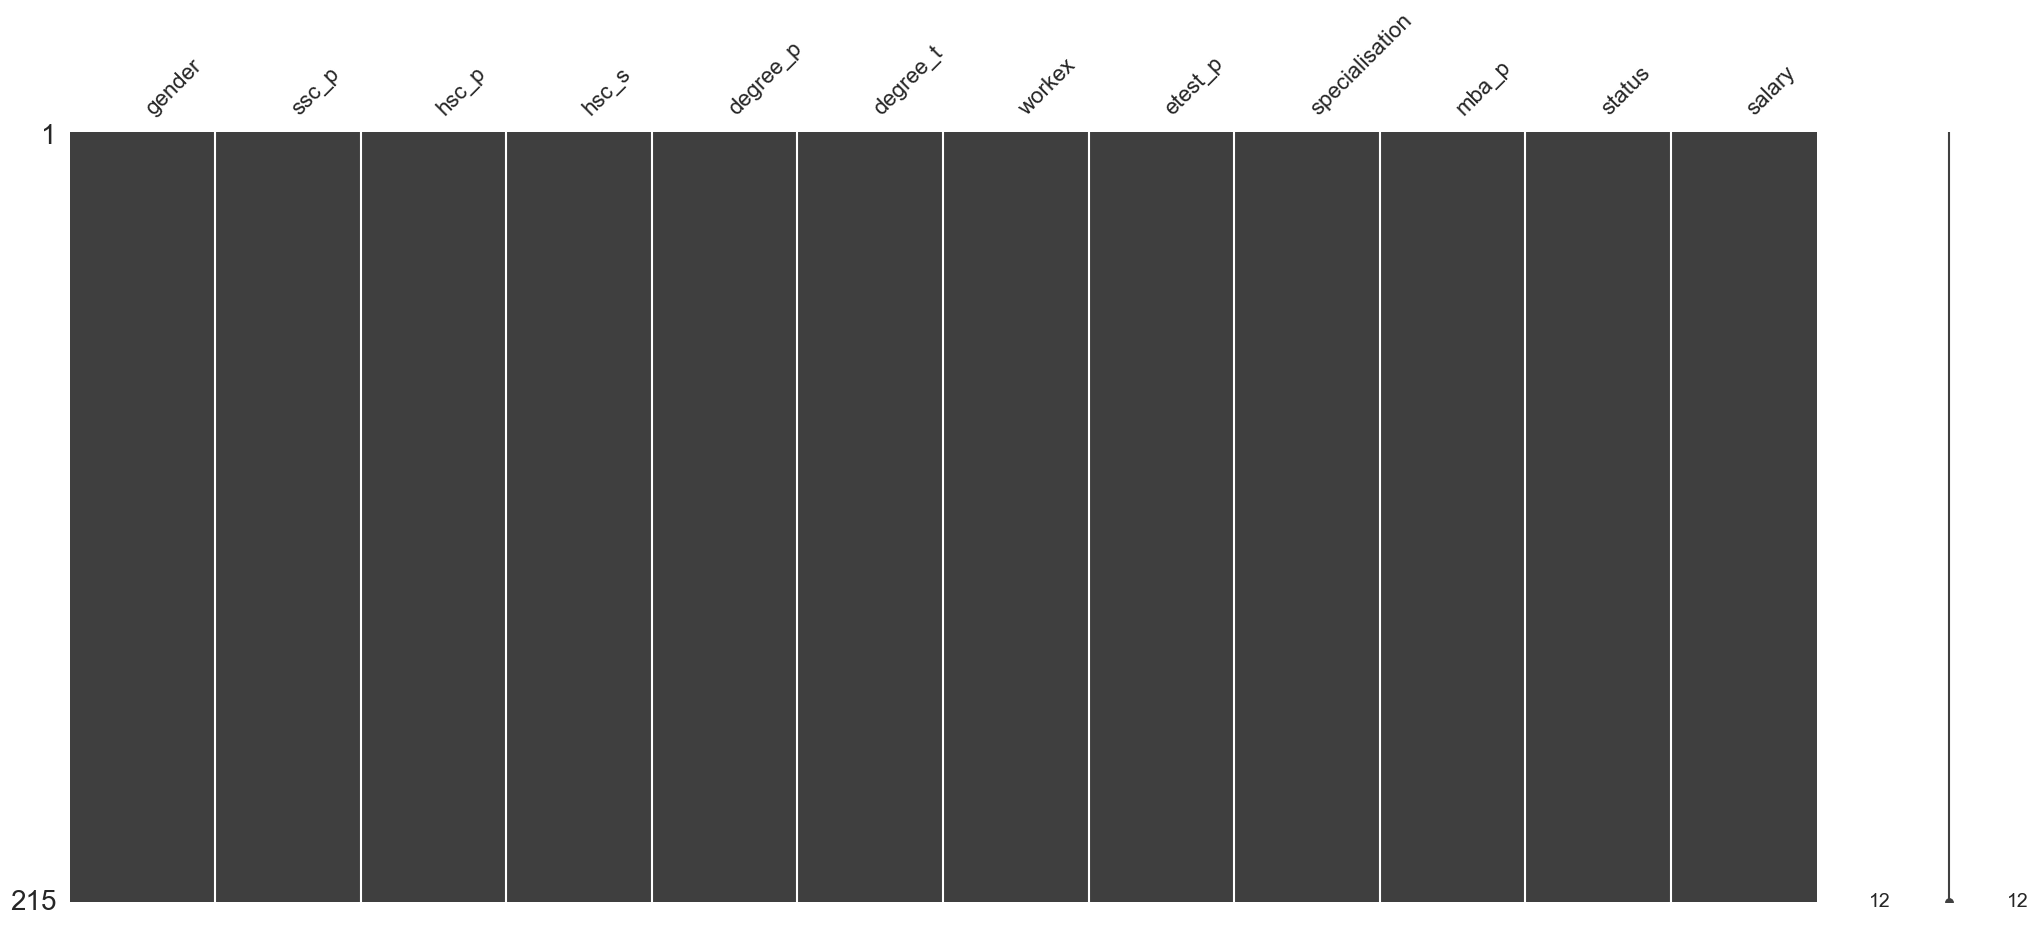

In [31]:
import missingno as msno 
msno.matrix(df)

In [10]:
print('Data columns with null values:',df.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


# 1.6 Check balance

In [11]:
class1 = df[df['status'] == 'Placed']
print("First class", class1.shape[0])
class2 = df[df['status'] == 'Not Placed']
print("Second class",class2.shape[0])

First class 148
Second class 67


# 1.7 Statistic value

In [12]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# 1.8 Check dublicates

In [13]:
df.duplicated().sum()

0

> # 2.0 Data Cleaning

# 2.1 Handling missing values

In [14]:
df['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',df['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


# 2.2 drop unwanted features

In [15]:
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# 2.3 Outliers

Text(0.5, 1.0, 'Employability percentage')

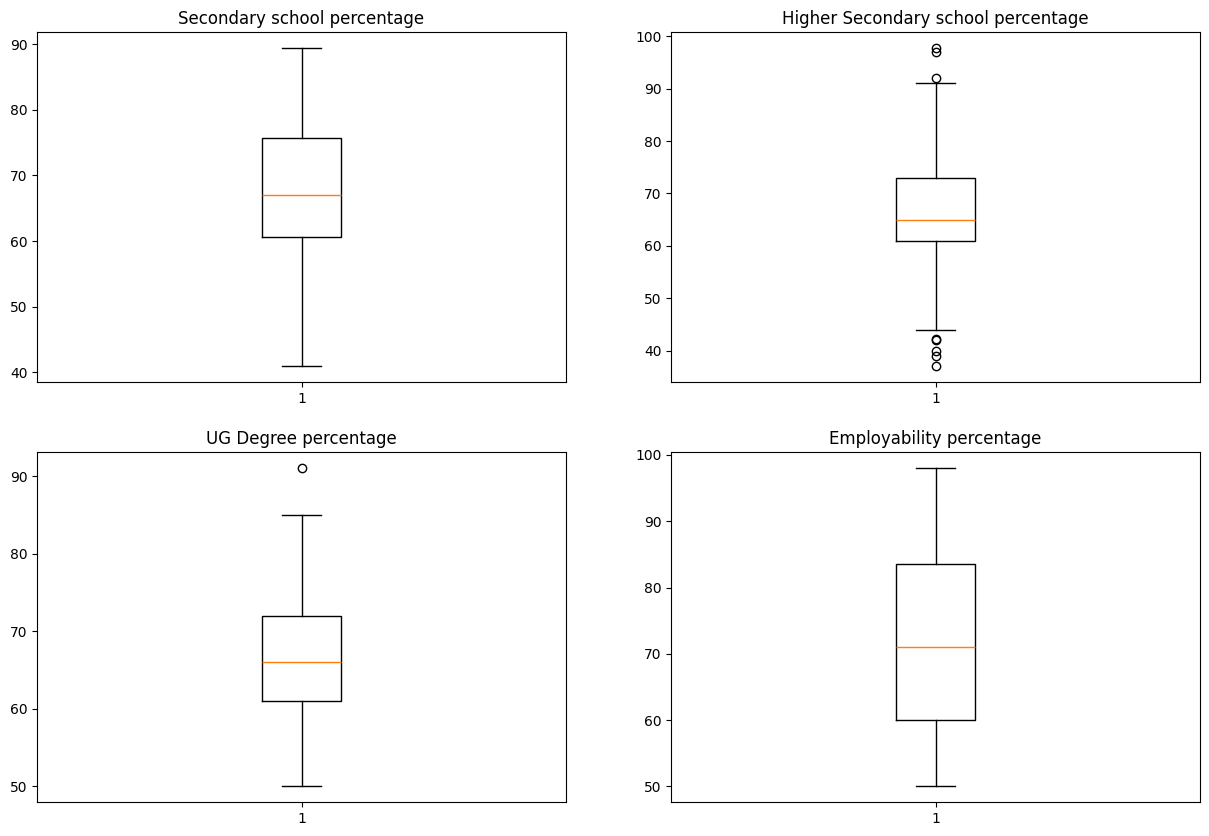

In [20]:
plt.figure(figsize = (15, 10))

ax=plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability percentage')

In [ ]:
from sklearn.preprocessing import LabelEncoder
df.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
 
df.head()



,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,NaN
4,1,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


# 2.4 Handling outliers

In [17]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.  

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)

placement_filtered=df.loc[filter]

> # 3.0 Data Visualizations

# 3.1 Numerical features

In [18]:
num_features = df[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
num_features

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,67.00,91.00,58.00,55.0,58.80
1,79.33,78.33,77.48,86.5,66.28
2,65.00,68.00,64.00,75.0,57.80
3,56.00,52.00,52.00,66.0,59.43
4,85.80,73.60,73.30,96.8,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49
211,58.00,60.00,72.00,74.0,53.62
212,67.00,67.00,73.00,59.0,69.72
213,74.00,66.00,58.00,70.0,60.23


# 3.2 Numerical data visualizations

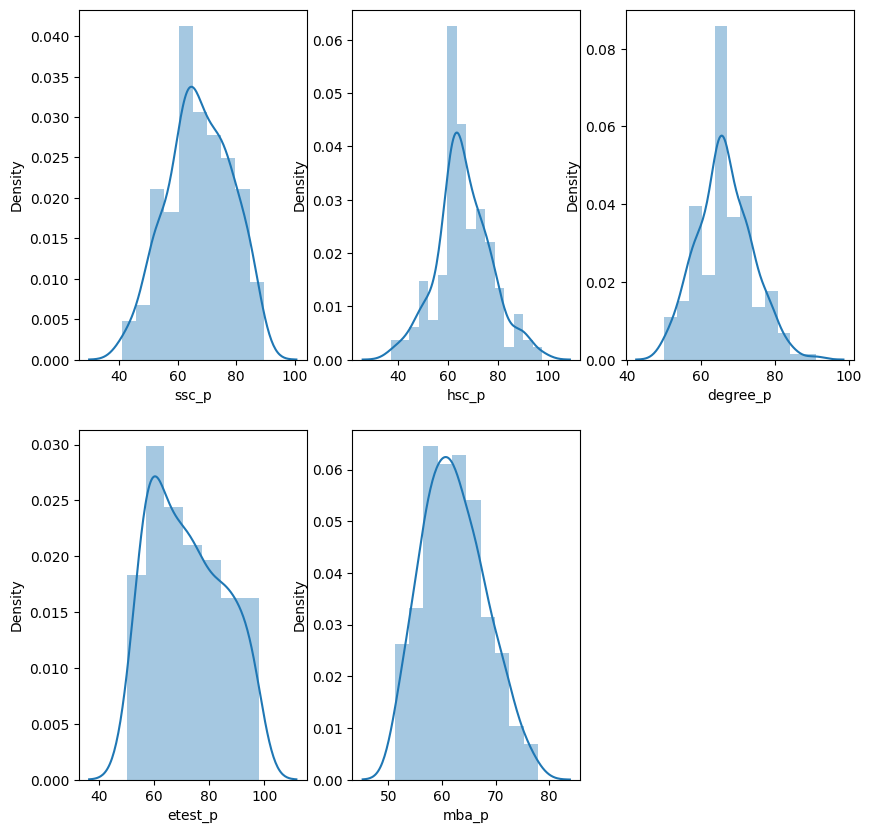

In [21]:
plt.figure(figsize = (15, 7))

plt.subplot(231)
sns.distplot(num_features['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(num_features['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(num_features['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(num_features['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(num_features['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)


# 3.3 Employability score vs Salary- Joint plot

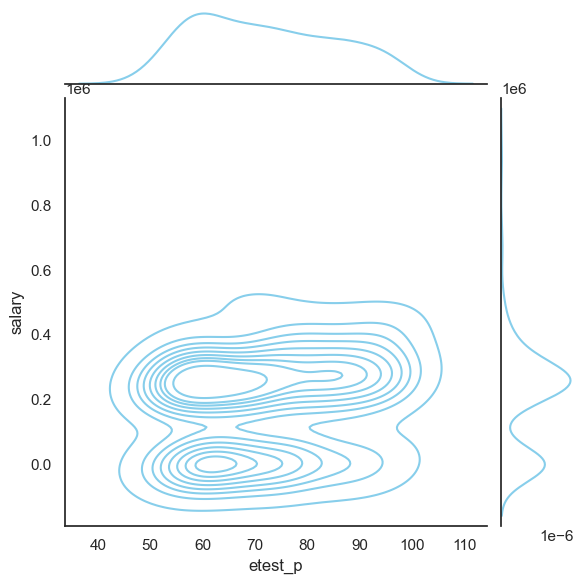

In [22]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["etest_p"], y=df["salary"], kind='kde', color="skyblue")

Inference

1. Most of the candidates scored around 60 percentage got a decent package of around 3 lakhs PA
2. Not many candidates received salary more than 4 lakhs PA
3. The bottom dense part shows the candidates who were not placed

# 3.4 Categorical features

In [23]:
cat_features = df[['gender','hsc_s','degree_t','workex','specialisation','status']]
cat_features

,gender,hsc_s,degree_t,workex,specialisation,status
0,M,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...
210,M,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


# 3.5 Categorical features visualizations

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

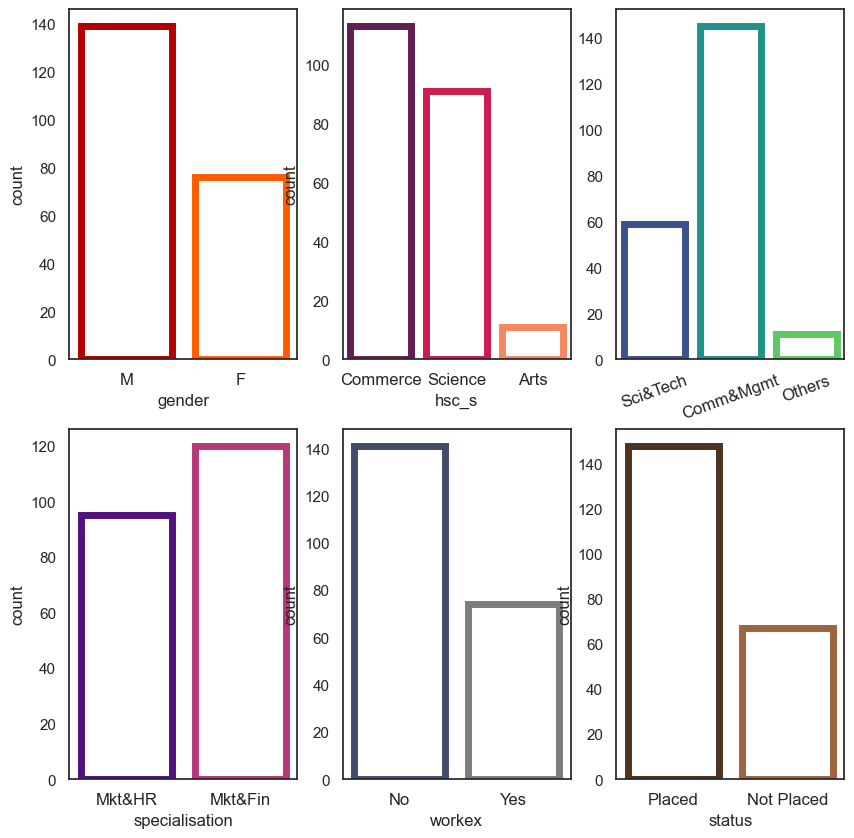

In [27]:
plt.figure(figsize = (15, 7))


#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=cat_features, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=cat_features, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=cat_features, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=cat_features, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=cat_features, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=cat_features, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)


# 3.6 Work experience Vs Placement Status

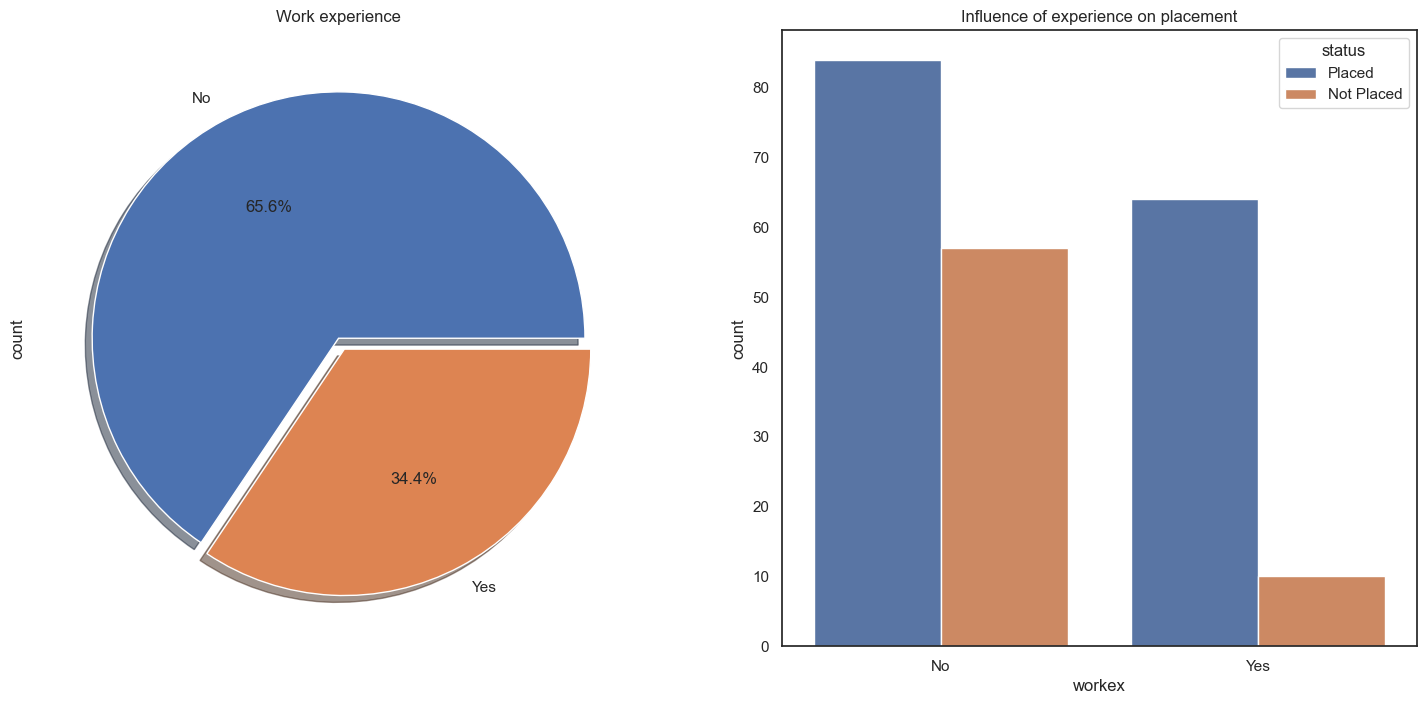

In [28]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
f,ax=plt.subplots(1,2,figsize=(18,8))
df['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = df)
ax[1].set_title('Influence of experience on placement')
plt.show()

# 3.7 Coorelation between academic percentages

<Axes: >

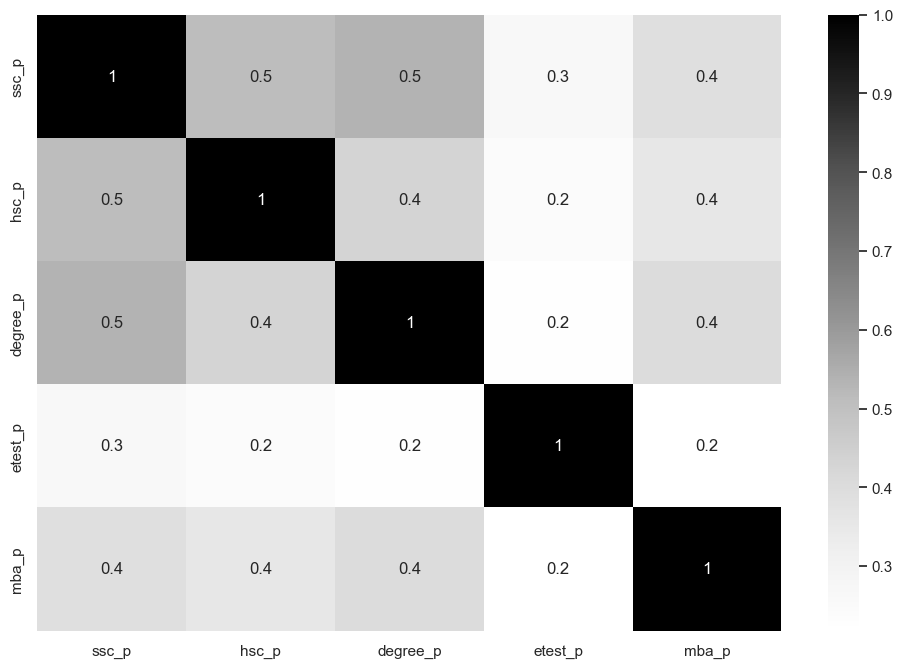

In [29]:
sns.heatmap(num_features.corr(),annot=True,fmt='.1g',cmap='Greys')

# 3.8 Distribution of our data

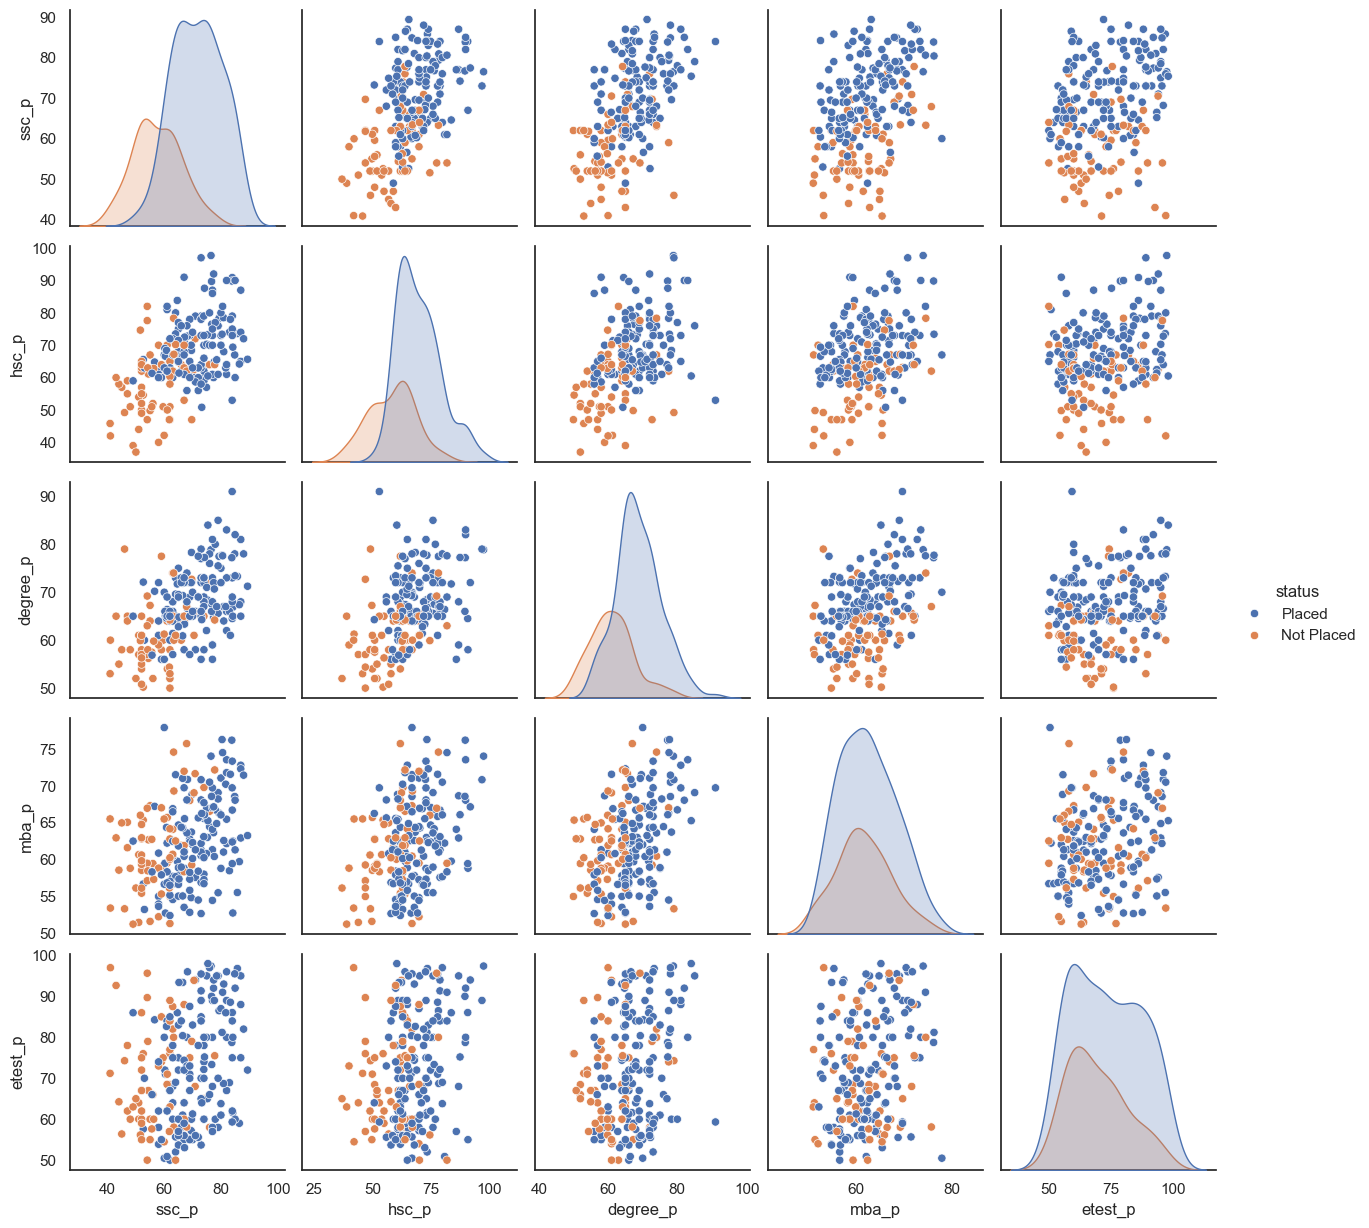

In [30]:
sns.pairplot(df,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")